In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load literature data
dekois_literature = pd.read_excel('/home/alacournola/DockM8/results/DEKOIS_RESULTS/DEKOIS_literature.xlsx')
# Load DockM8 data
dekois_ef1 = pd.read_csv('/home/alacournola/DEKOIS_2.0x/DEKOIS_RESULTS/results_dockm8_EF_1%.csv')
#Determine DockM8-max
max_values = dekois_ef1.iloc[:, 3:].max()
column_names = dekois_ef1.columns[3:]
max_df = pd.DataFrame({'Target': column_names, 'Model' : 'DockM8-max', 'EF1': max_values}).reset_index(drop=True)
#Determine DockM8-best
dekois_ef1['average'] = dekois_ef1.iloc[:, 3:].mean(axis=1)
dekois_ef1 = dekois_ef1.sort_values(by='average', ascending=False)
dekois_ef1 = dekois_ef1.head(1)
dekois_ef1 = dekois_ef1.drop(columns=['average'])
best_df = pd.melt(dekois_ef1, value_vars=dekois_ef1.columns[3:], var_name='Target', value_name='EF1')
best_df['Model'] = 'DockM8-best'
best_df = best_df[['Target', 'Model', 'EF1']]
#concatenate all data
dekois_literature_filtered = dekois_literature#[dekois_literature['Target'].isin(column_names)]
dekois_final = pd.concat([dekois_literature_filtered, best_df, max_df])
dekois_final = dekois_final.drop(columns=['Source'])
dekois_final = dekois_final.sort_values(by = 'Target', ascending = True)
ef1_df = pd.melt(dekois_final, id_vars=['Model'], value_vars=['EF1'], var_name='EF1', value_name='Score')
unique_models = ef1_df['Model'].unique()
median_by_method_ef1 = dekois_final.groupby('Model')['EF1'].median().sort_values(ascending=False).index
print(median_by_method_ef1)
# Assign colors based on the median values
color_palette = sns.color_palette("RdYlGn", n_colors=len(median_by_method_ef1))[::-1]
color_dict = dict(zip(median_by_method_ef1, color_palette))
for key in color_dict.keys():
    if 'DockM8' in key:
        color_dict[key] = 'orange'
ef1_df['color'] = ef1_df['Model'].map(color_dict)
ef1_df.loc[ef1_df['Model'].str.contains('DockM8'), 'color'] = 'orange'

Index(['DockM8-max', 'DockM8-best', 'IGN(avg)@IGN', 'RTMScore@GlideSP',
       'GenScore(ft_0.5)', 'KarmaDock Raw', 'KarmaDock FF',
       'KarmaDock Aligned', 'RF-Score-VS@IGN', 'Glide@SP', 'GlideSP@GlideSP',
       'RF-Score-VS@GlideSP', 'LeDock', 'Surflex', 'Gold@ChemPLP',
       'PLECRF(ODDT)@GlideSP', 'RF-Scorev3(ODDT)@GlideSP', 'DLIGAND2',
       'RF-Scorev2(ODDT)@GlideSP', 'deltaVinaXGB@GlideSP',
       'deltaVinaRF20@GlideSP', 'RF-Scorev4@GlideSP', 'pafnucy@GlideSP',
       'OnionNet@GlideSP', 'NNscore2.0@GlideSP', 'NNscore1.0@GlideSP',
       'RF-Scorev3@GlideSP', 'RF-Scorev1(ODDT)@GlideSP', 'TankBind',
       'TranformerCPI', 'NNscore(ODDT)@GlideSP', 'AutoDock Vina'],
      dtype='object', name='Model')


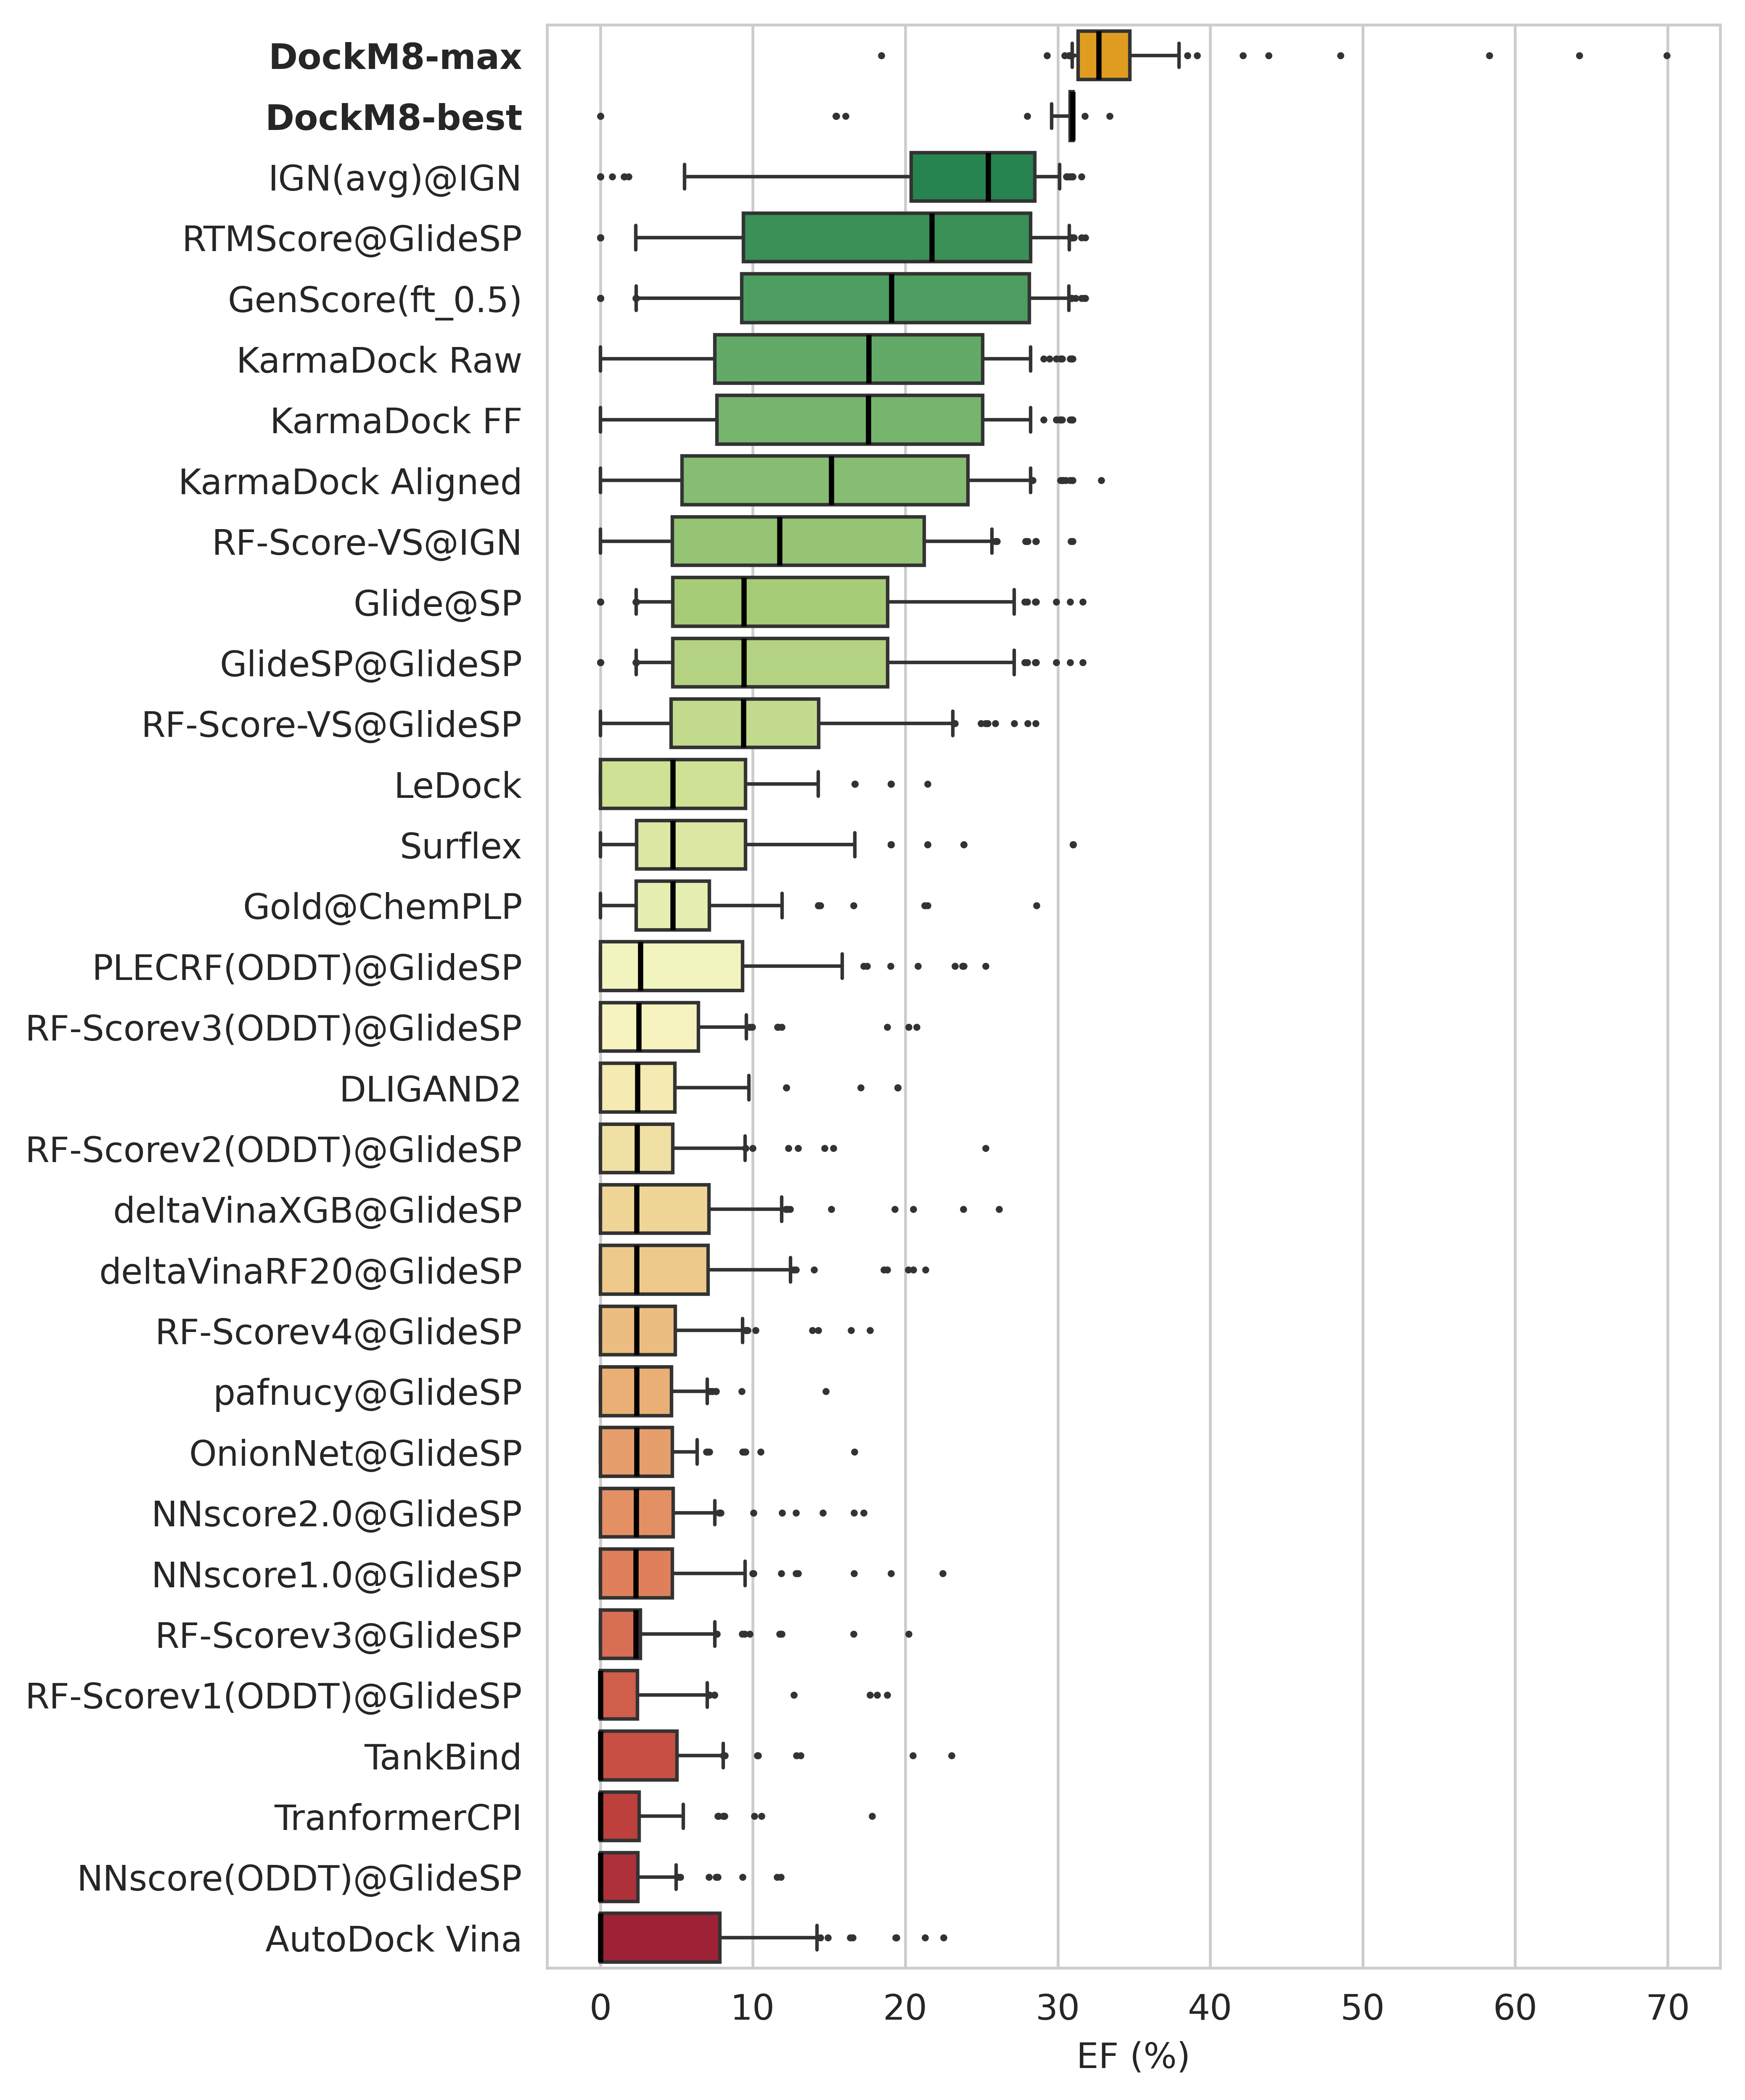

In [3]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 10), dpi=600)
plot = sns.boxplot(x='Score', y='Model', hue='Model', data=ef1_df, 
            order = median_by_method_ef1, 
            native_scale = True, palette=color_dict, legend=False,
            linewidth=1,
            fliersize=1, 
            whis=(10, 90), 
            medianprops={"color": "black", "linewidth": 1.5})
#plt.title('Box Plot of EF Values for Each Model on DEKOIS 2.0')
plt.ylabel(None)
plt.xlabel('EF (%)')
plt.xticks(fontsize=10)

for idx, label in enumerate(plot.get_yticklabels()):
    if idx < 2:
        label.set_fontweight('bold')
    else:
        label.set_fontweight('normal')

plt.savefig("/home/alacournola/DockM8/results/plots/DEKOIS_all_models_EF1.png", transparent=False, bbox_inches='tight')
plt.show()

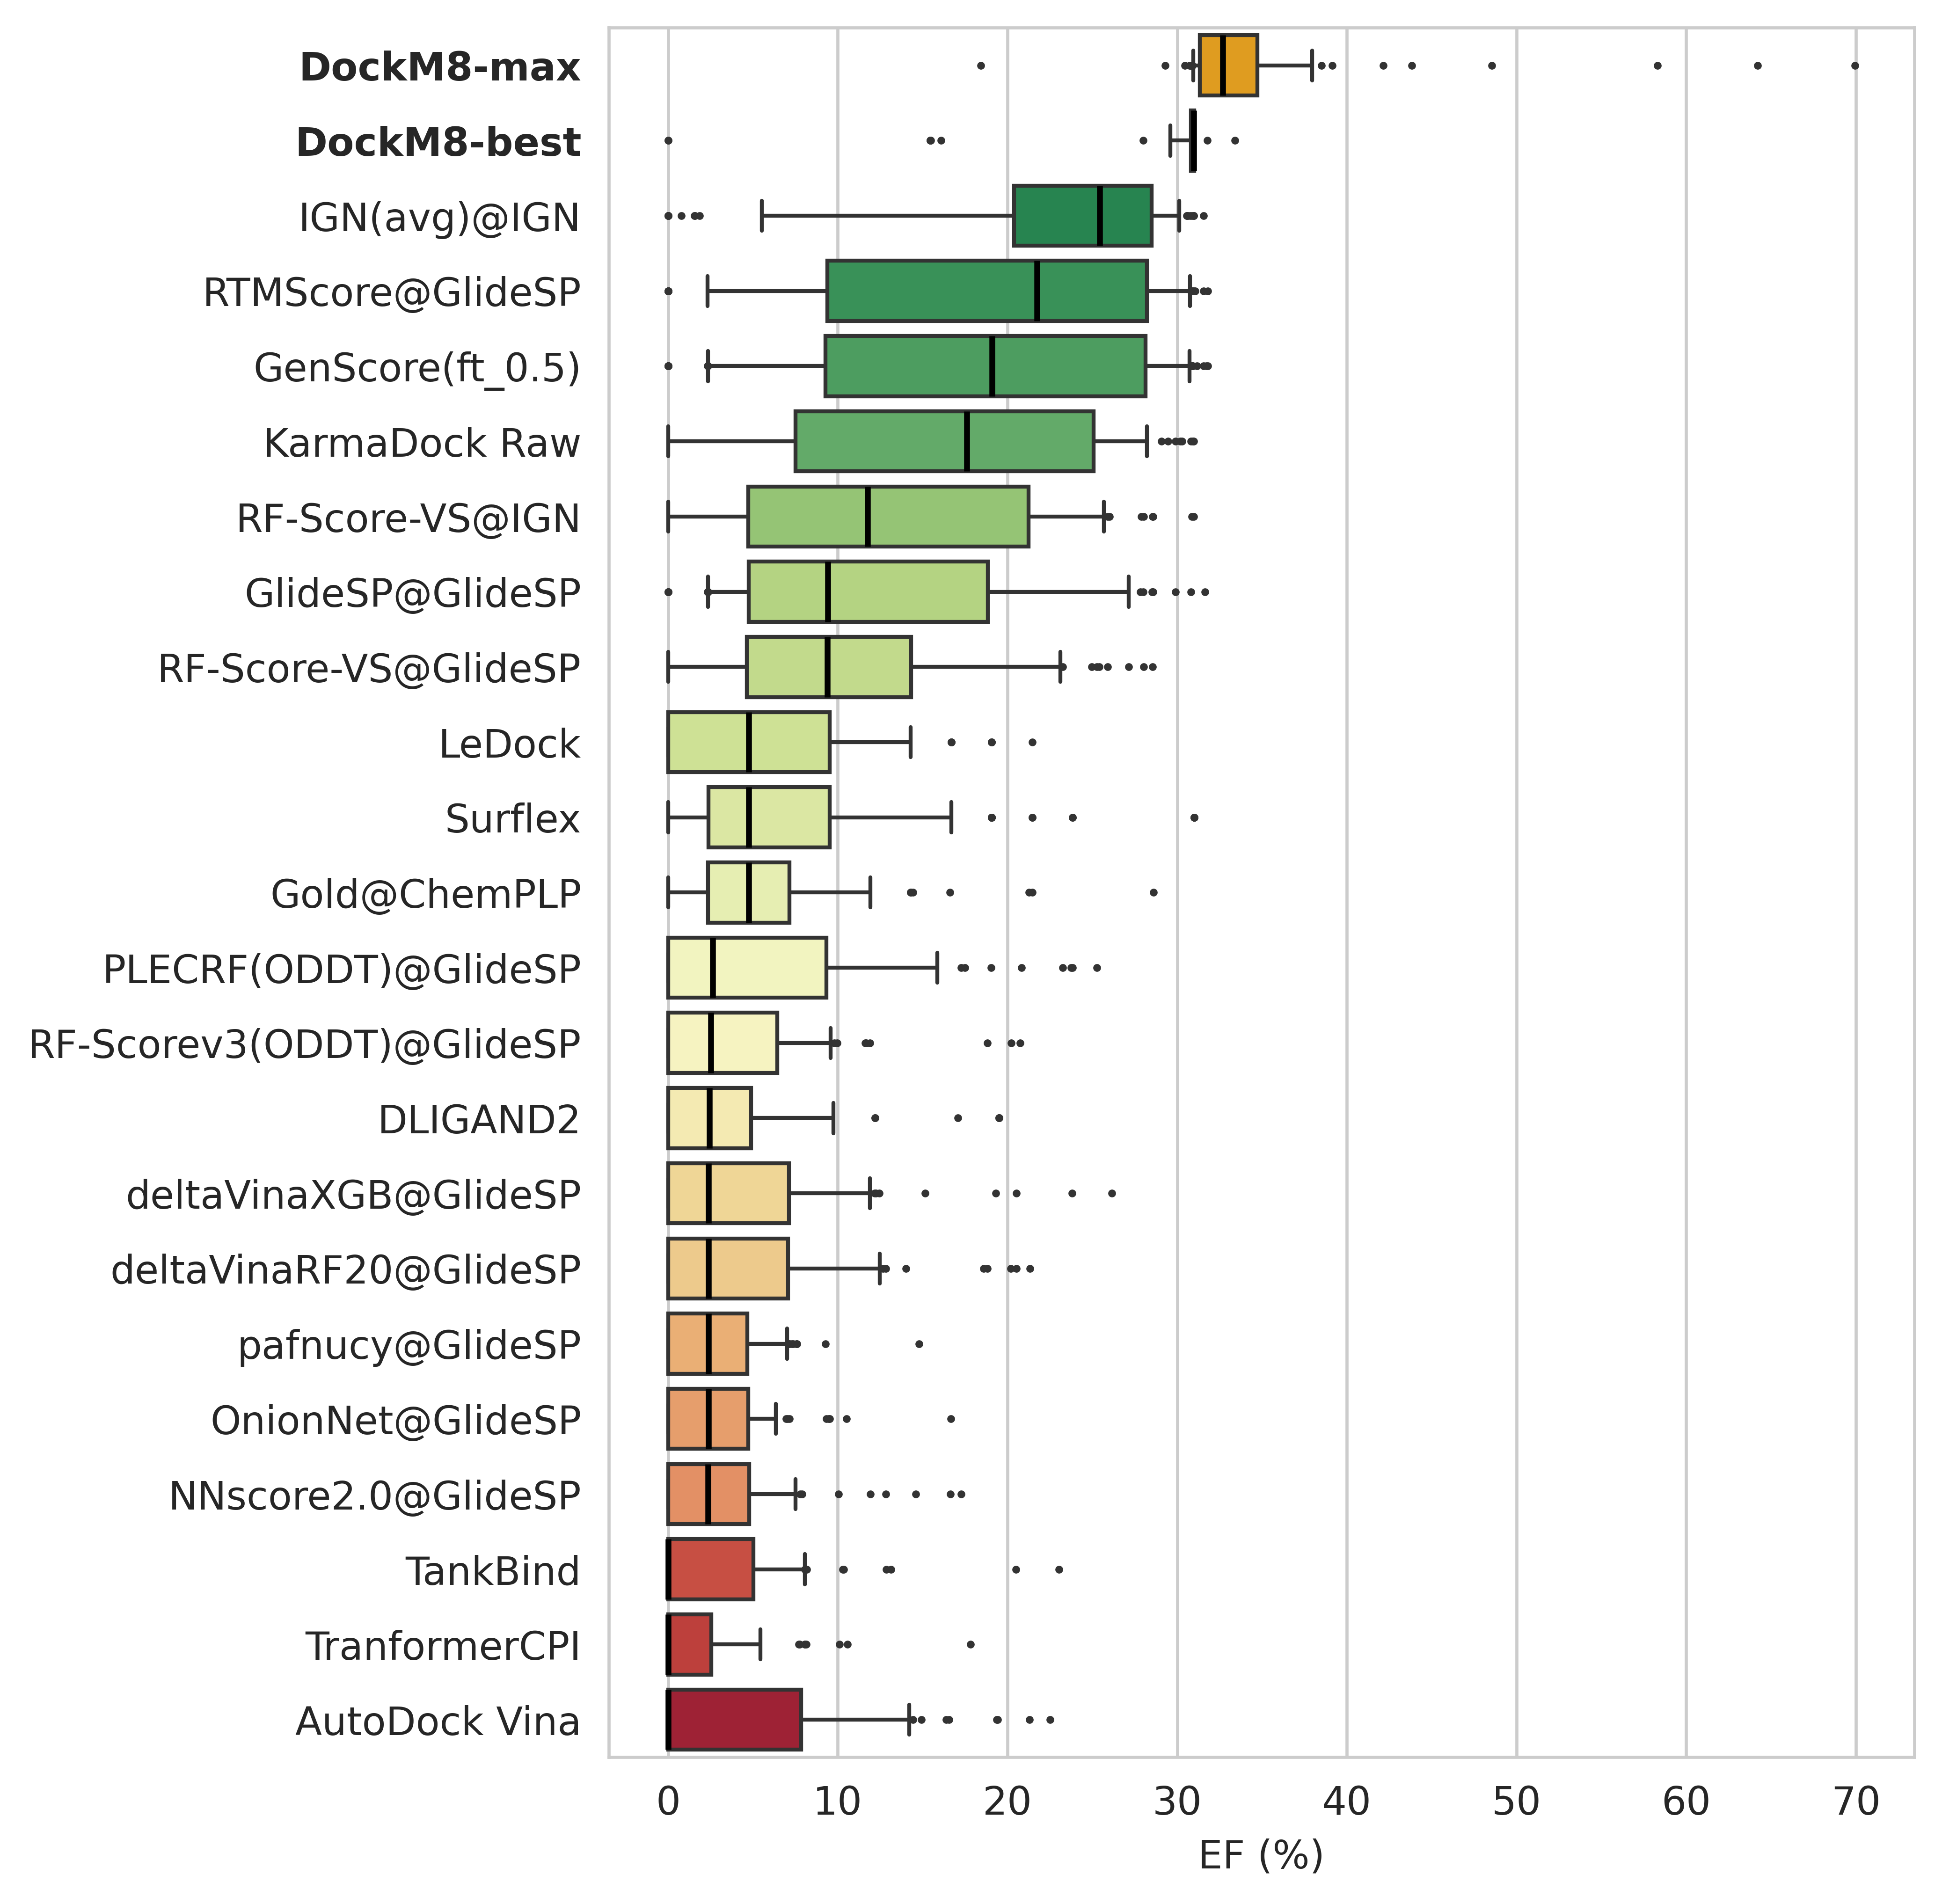

In [4]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 8), dpi=600)
plot = sns.boxplot(x='Score', y='Model', hue='Model', data=ef1_df, 
            order = ['DockM8-max', 'DockM8-best', 'IGN(avg)@IGN', 'RTMScore@GlideSP',
                    'GenScore(ft_0.5)', 'KarmaDock Raw', 'RF-Score-VS@IGN', 'GlideSP@GlideSP',
                    'RF-Score-VS@GlideSP', 'LeDock', 'Surflex', 'Gold@ChemPLP',
                    'PLECRF(ODDT)@GlideSP', 'RF-Scorev3(ODDT)@GlideSP', 'DLIGAND2', 'deltaVinaXGB@GlideSP',
                    'deltaVinaRF20@GlideSP', 'pafnucy@GlideSP', 'OnionNet@GlideSP', 'NNscore2.0@GlideSP', 
                    'TankBind', 'TranformerCPI', 'AutoDock Vina'], 
            native_scale = True, palette=color_dict, legend=False,
            linewidth=1,
            fliersize=1, 
            whis=(10, 90), 
            medianprops={"color": "black", "linewidth": 1.5})
#plt.title('Box Plot of EF Values for Each Model on DEKOIS 2.0')
plt.ylabel(None)
plt.xlabel('EF (%)')
plt.xticks(fontsize=10)
for idx, label in enumerate(plot.get_yticklabels()):
    if idx < 2:
        label.set_fontweight('bold')
    else:
        label.set_fontweight('normal')
plt.savefig("/home/alacournola/DockM8/results/plots/DEKOIS_comparison_EF1.png", transparent=False, bbox_inches='tight')
plt.show()

In [5]:
# Load literature data
dekois_literature = pd.read_excel('/home/alacournola/DockM8/results/DEKOIS_RESULTS/DEKOIS_literature.xlsx')
dekois_literature.dropna(subset=['AUC_ROC'], inplace=True)
# Load DockM8 data
dekois_aucroc = pd.read_csv('/home/alacournola/DEKOIS_2.0x/DEKOIS_RESULTS/results_dockm8_AUC_ROC.csv')
# Remove rows where any cell value is greater than 1
dekois_aucroc = dekois_aucroc[(dekois_aucroc.iloc[:, 3:] <= 1).all(axis=1)]
# Determine DockM8-max
max_values = dekois_aucroc.iloc[:, 3:].max()
column_names = dekois_aucroc.columns[3:]
max_df = pd.DataFrame({'Target': column_names, 'Model': 'DockM8-max', 'AUC_ROC': max_values}).reset_index(drop=True)
# Determine DockM8-best
dekois_aucroc['average'] = dekois_aucroc.iloc[:, 3:].mean(axis=1)
dekois_aucroc = dekois_aucroc.sort_values(by='average', ascending=False)
dekois_aucroc = dekois_aucroc.head(1)
dekois_aucroc = dekois_aucroc.drop(columns=['average'])
best_df = pd.melt(dekois_aucroc, value_vars=dekois_aucroc.columns[3:], var_name='Target', value_name='AUC_ROC')
best_df['Model'] = 'DockM8-best'
best_df = best_df[['Target', 'Model', 'AUC_ROC']]
# Concatenate all data
dekois_literature_filtered = dekois_literature#[dekois_literature['Target'].isin(column_names)]
dekois_final = pd.concat([dekois_literature_filtered, best_df, max_df])
dekois_final = dekois_final.drop(columns=['Source'])
dekois_final = dekois_final.sort_values(by='Target', ascending=True)
aucroc_df = pd.melt(dekois_final, id_vars=['Model'], value_vars=['AUC_ROC'], var_name='AUC_ROC', value_name='Score')
unique_models = aucroc_df['Model'].unique()
median_by_method_aucroc = dekois_final.groupby('Model')['AUC_ROC'].median().sort_values(ascending=False).index
print(median_by_method_aucroc)
# Assign colors based on the median values
color_palette = sns.color_palette("RdYlGn", n_colors=len(median_by_method_aucroc))[::-1]
color_dict = dict(zip(median_by_method_aucroc, color_palette))
for key in color_dict.keys():
    if 'DockM8' in key:
        color_dict[key] = 'orange'
aucroc_df['color'] = aucroc_df['Model'].map(color_dict)
aucroc_df.loc[aucroc_df['Model'].str.contains('DockM8'), 'color'] = 'orange'

Index(['DockM8-max', 'DockM8-best', 'IGN(avg)@IGN', 'KarmaDock Raw',
       'KarmaDock FF', 'RF-Score-VS@IGN', 'KarmaDock Aligned',
       'GenScore(ft_0.5)', 'RTMScore@GlideSP', 'RF-Score-VS@GlideSP',
       'Glide@SP', 'GlideSP@GlideSP', 'LeDock', 'Surflex',
       'NNscore2.0@GlideSP', 'AutoDock Vina', 'deltaVinaRF20@GlideSP',
       'Gold@ChemPLP', 'deltaVinaXGB@GlideSP', 'RF-Scorev2(ODDT)@GlideSP',
       'PLECRF(ODDT)@GlideSP', 'RF-Scorev4@GlideSP', 'pafnucy@GlideSP',
       'NNscore1.0@GlideSP', 'TankBind', 'RF-Scorev3(ODDT)@GlideSP',
       'RF-Scorev1(ODDT)@GlideSP', 'OnionNet@GlideSP', 'RF-Scorev3@GlideSP',
       'TranformerCPI', 'NNscore(ODDT)@GlideSP'],
      dtype='object', name='Model')


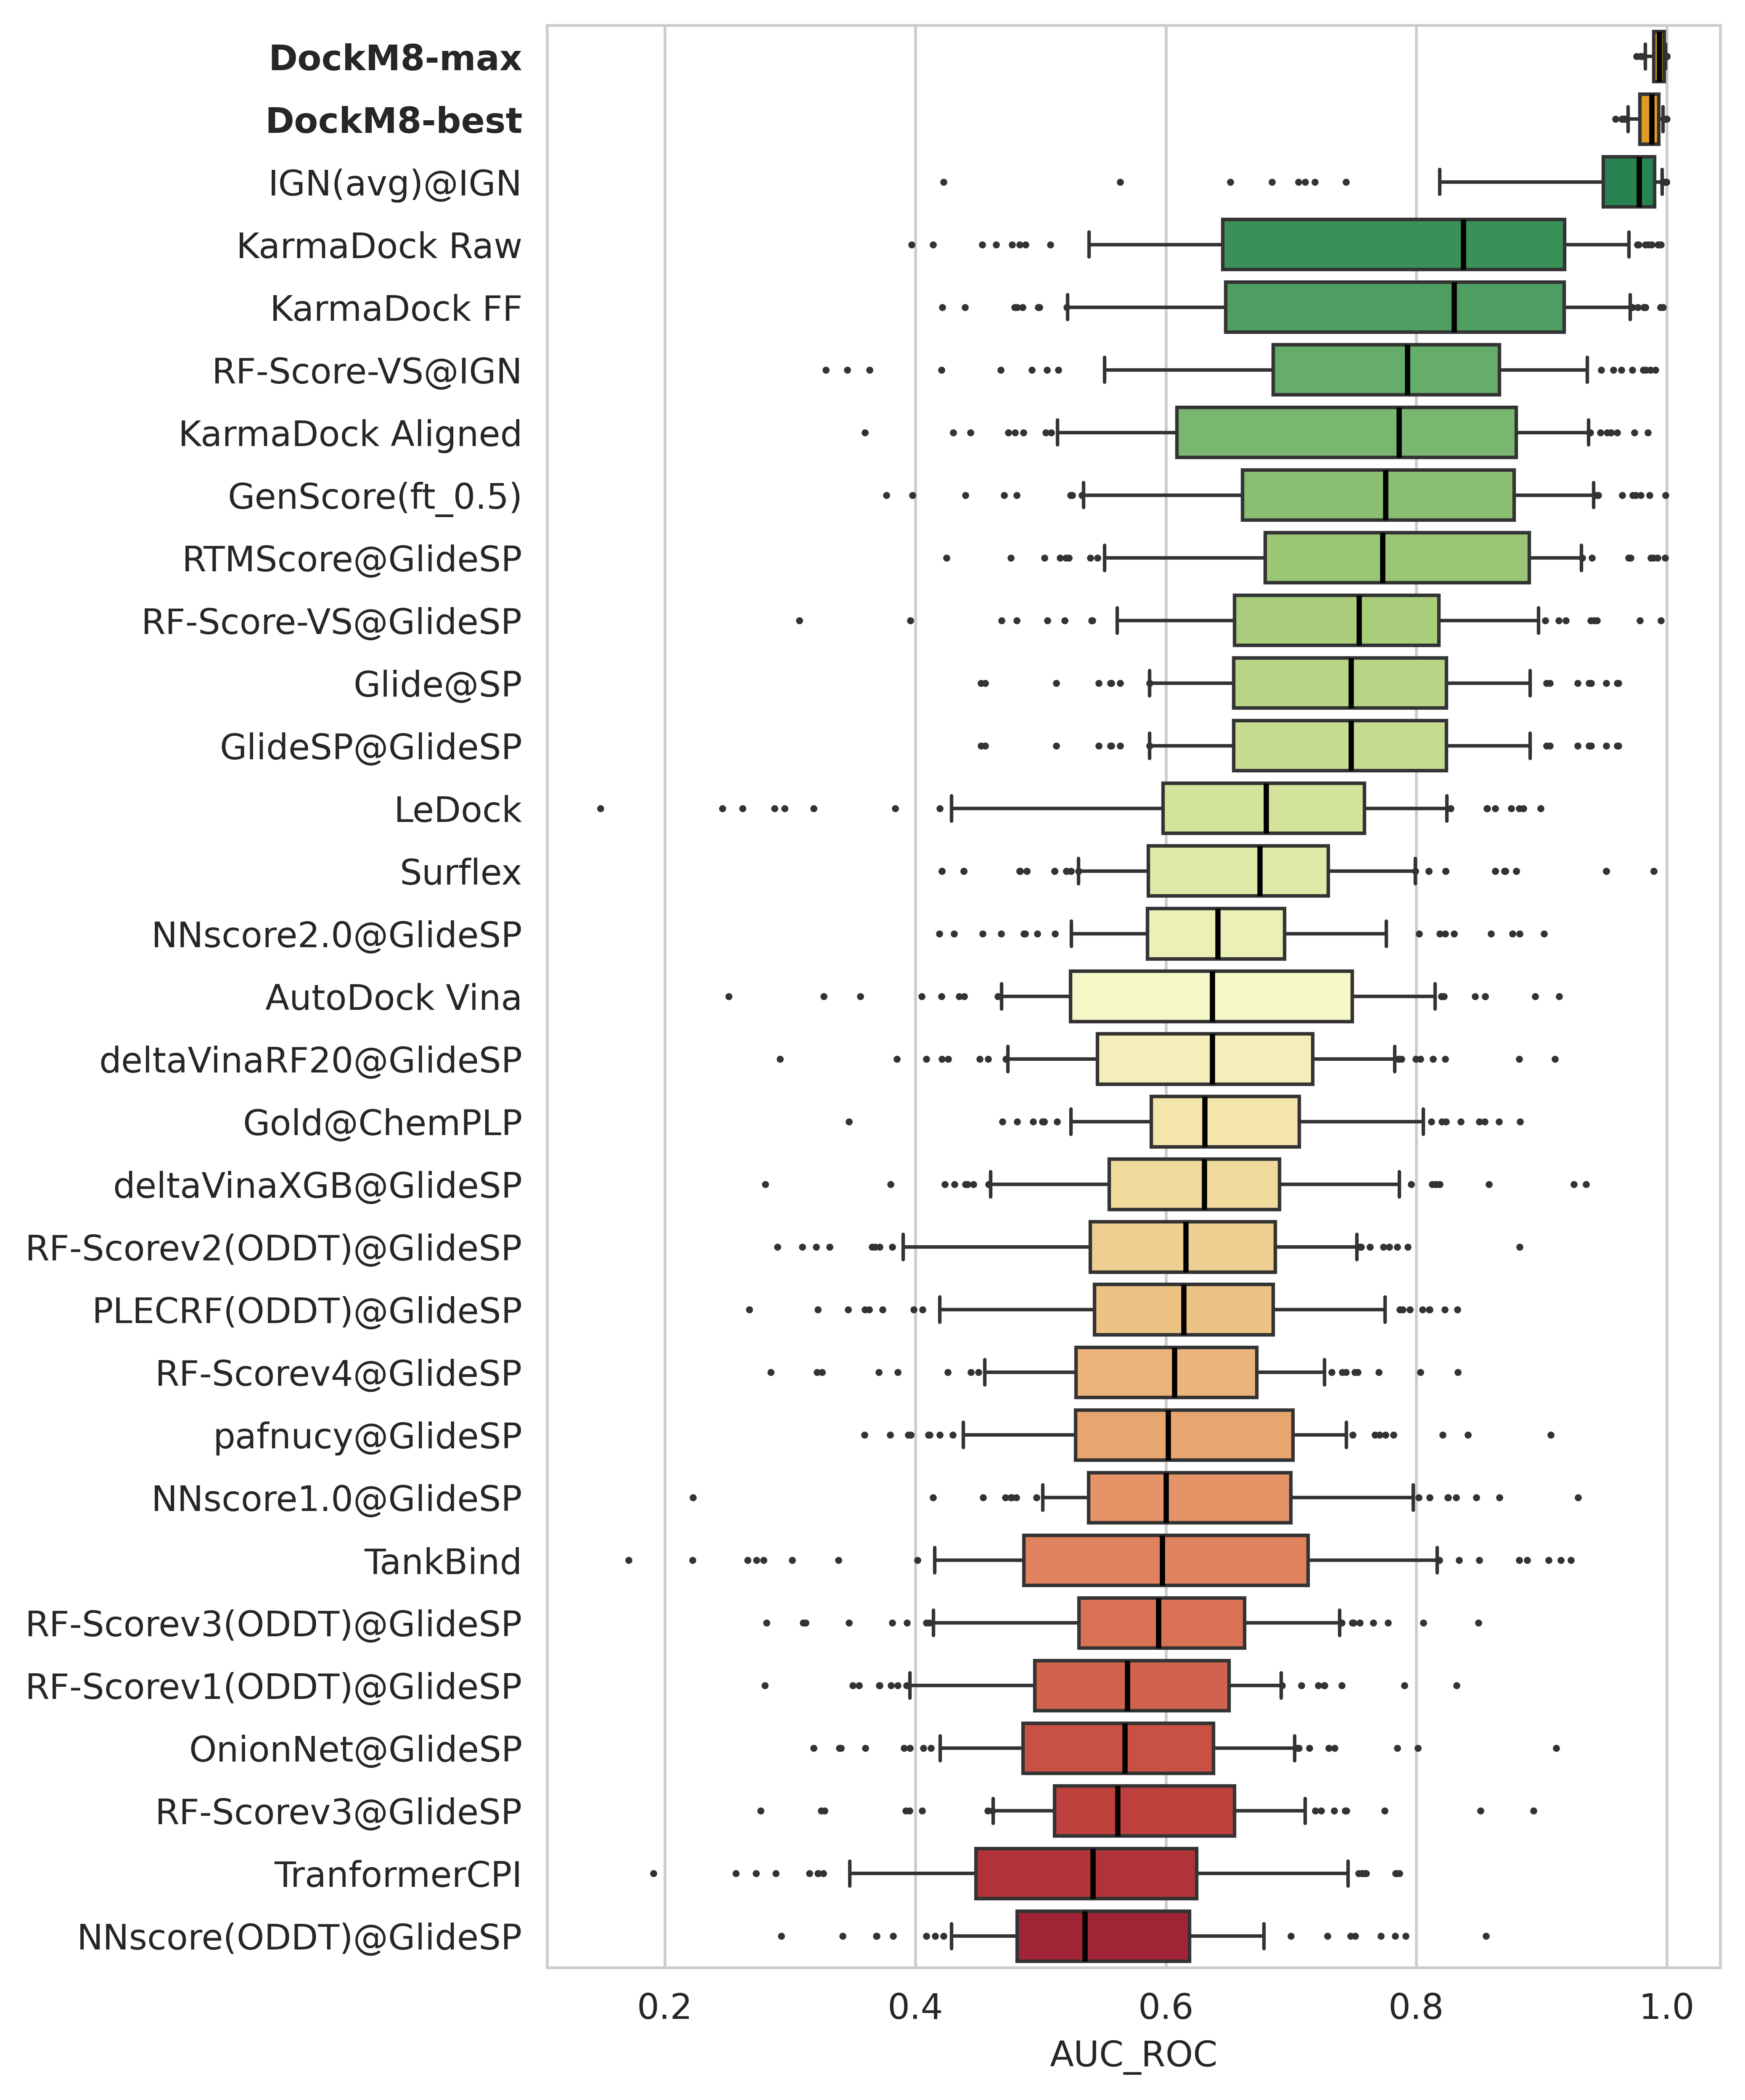

In [6]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 10), dpi=600)
plot = sns.boxplot(x='Score', y='Model', hue='Model', data=aucroc_df, 
            order = median_by_method_aucroc, 
            native_scale = True, palette=color_dict, legend=False,
            linewidth=1,
            fliersize=1, 
            whis=(10, 90), 
            medianprops={"color": "black", "linewidth": 1.5})
#plt.title('Box Plot of EF Values for Each Model on DEKOIS 2.0')
plt.ylabel(None)
plt.xlabel('AUC_ROC')
plt.xticks(fontsize=10)
for idx, label in enumerate(plot.get_yticklabels()):
    if idx < 2:
        label.set_fontweight('bold')
    else:
        label.set_fontweight('normal')
plt.savefig("/home/alacournola/DockM8/results/plots/DEKOIS_all_models_AUCROC.png", transparent=False, bbox_inches='tight')
plt.show()

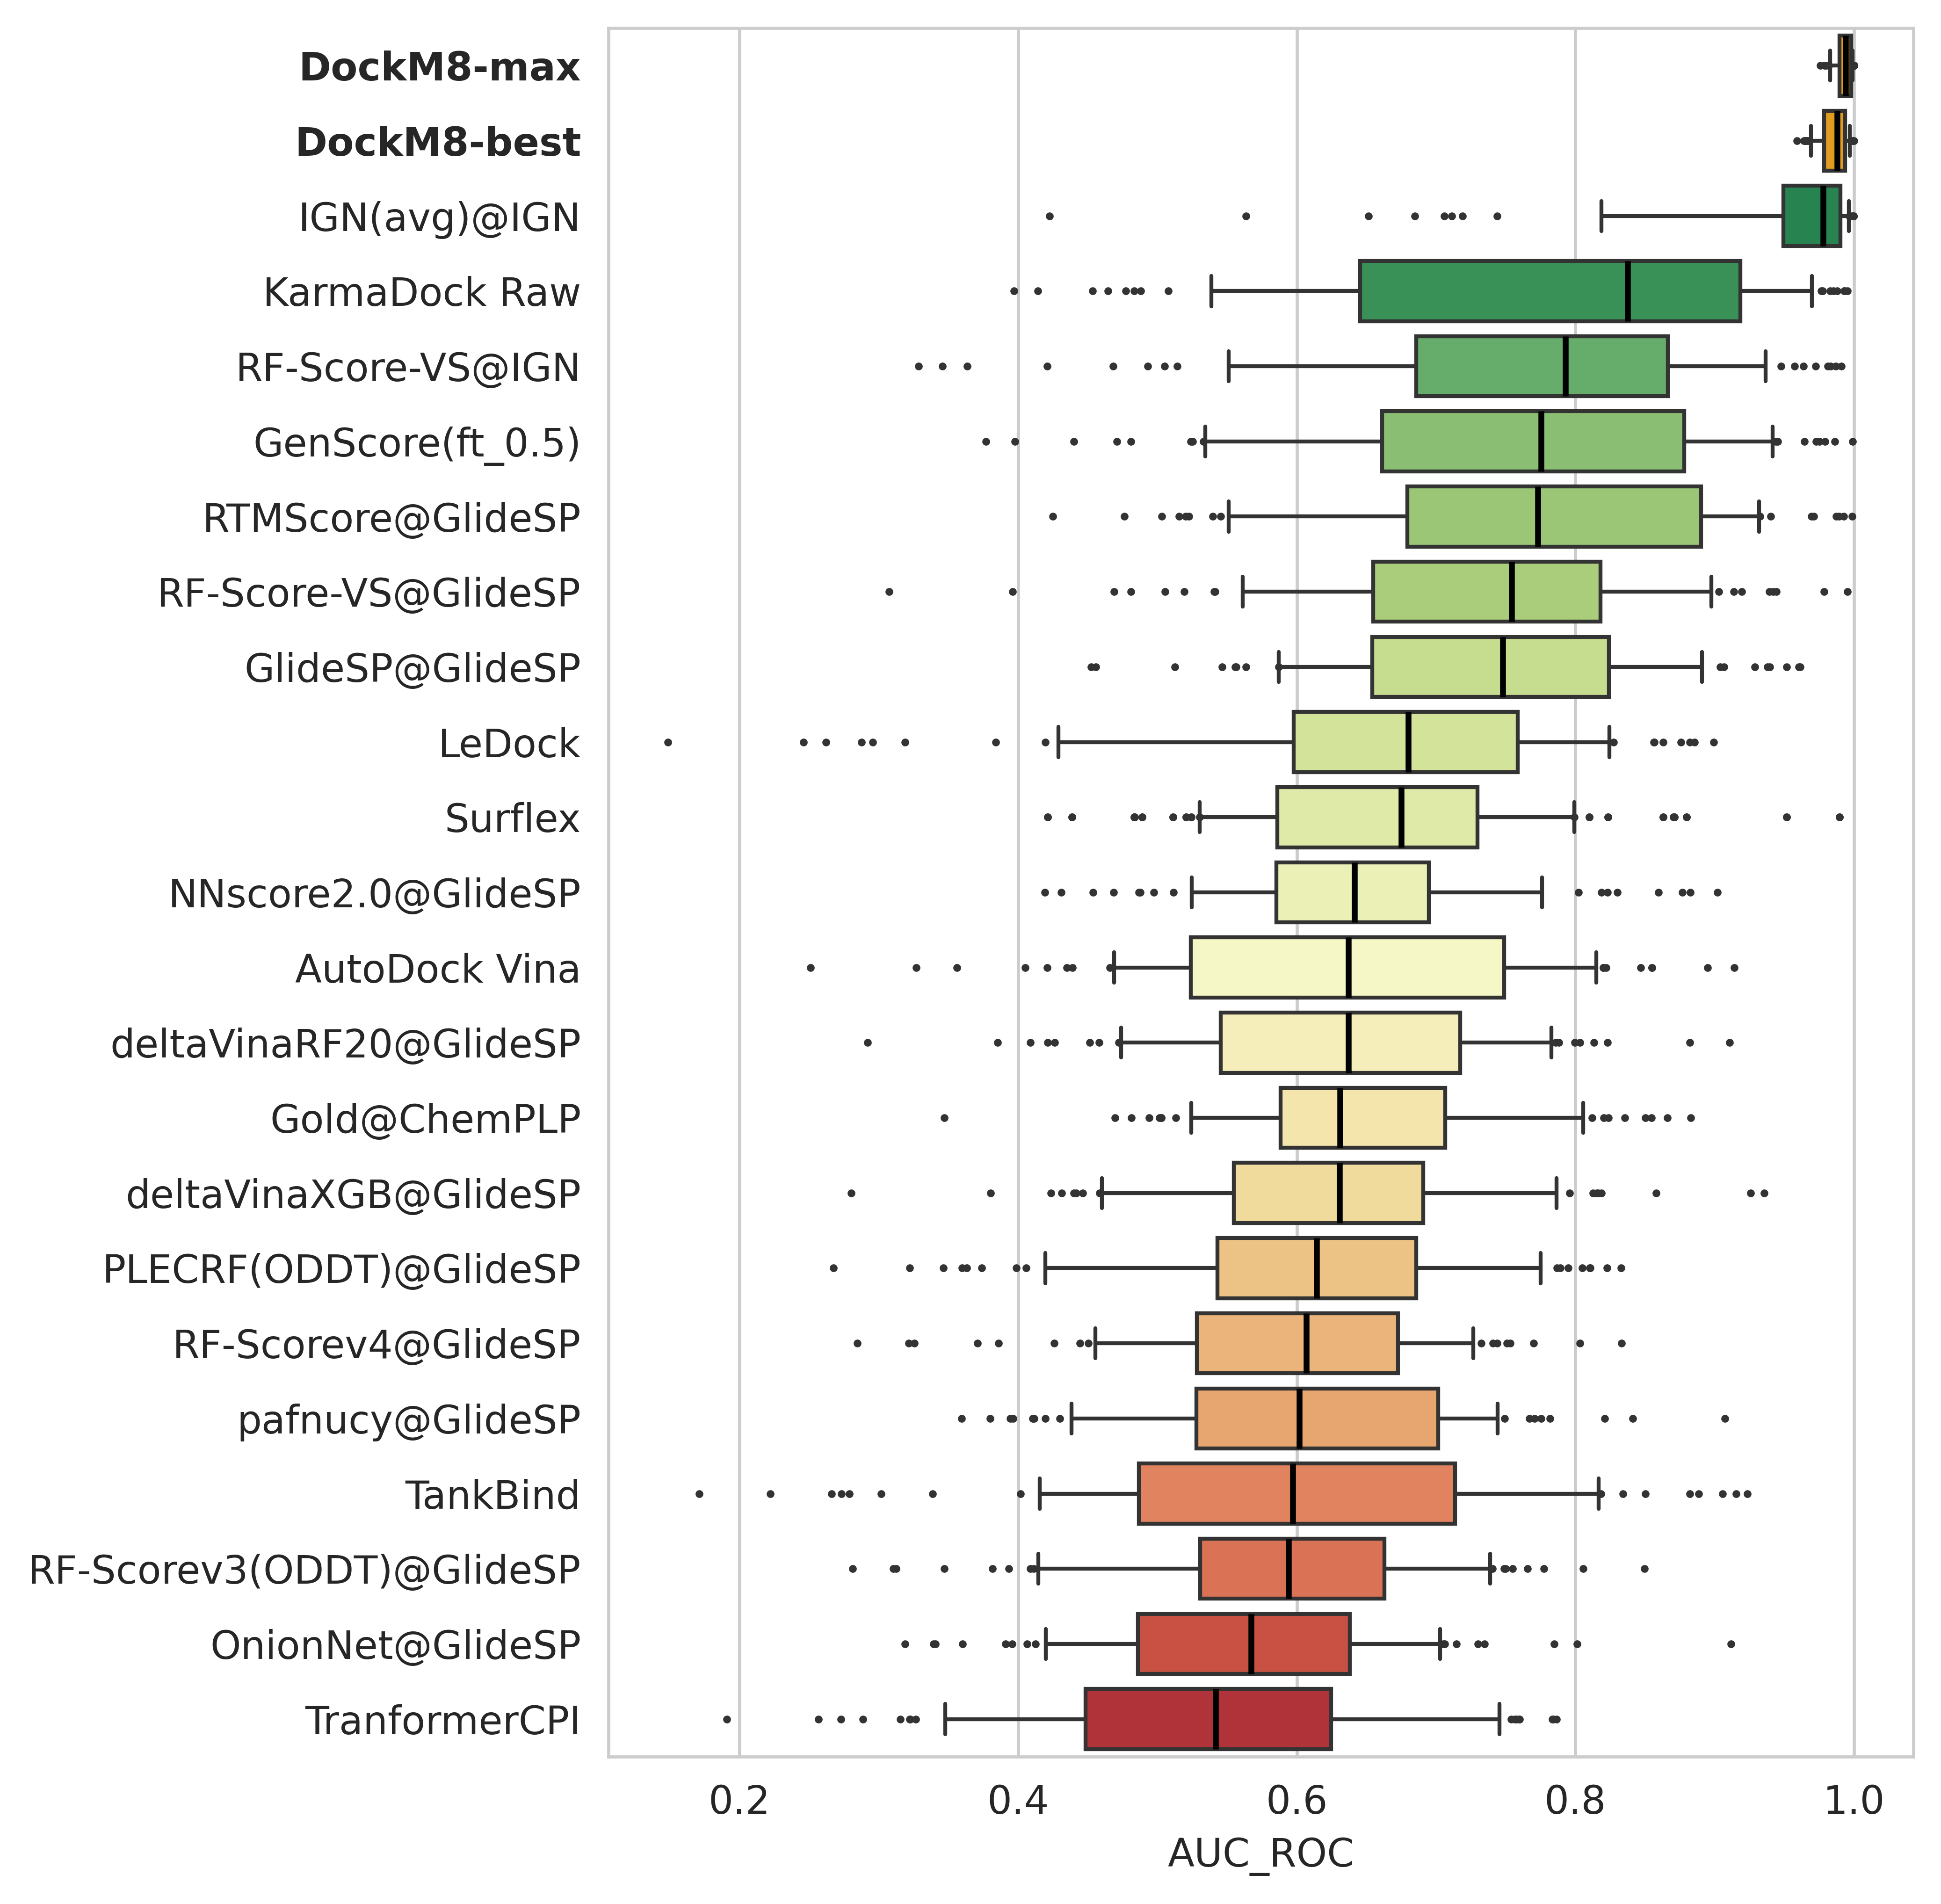

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 8), dpi=600)
plot = sns.boxplot(x='Score', y='Model', hue='Model', data=aucroc_df, 

            order = ['DockM8-max', 'DockM8-best', 'IGN(avg)@IGN', 'KarmaDock Raw',
                    'RF-Score-VS@IGN', 'GenScore(ft_0.5)', 'RTMScore@GlideSP', 'RF-Score-VS@GlideSP',
                    'GlideSP@GlideSP', 'LeDock', 'Surflex', 'NNscore2.0@GlideSP', 
                    'AutoDock Vina', 'deltaVinaRF20@GlideSP', 'Gold@ChemPLP', 'deltaVinaXGB@GlideSP', 
                    'PLECRF(ODDT)@GlideSP', 'RF-Scorev4@GlideSP', 'pafnucy@GlideSP', 'TankBind', 
                    'RF-Scorev3(ODDT)@GlideSP', 'OnionNet@GlideSP', 'TranformerCPI'],
            native_scale = True, palette=color_dict, legend=False,
            linewidth=1,
            fliersize=1, 
            whis=(10, 90), 
            medianprops={"color": "black", "linewidth": 1.5})
#plt.title('Box Plot of EF Values for Each Model on DEKOIS 2.0')
plt.ylabel(None)
plt.xlabel('AUC_ROC')
plt.xticks(fontsize=10)
for idx, label in enumerate(plot.get_yticklabels()):
    if idx < 2:
        label.set_fontweight('bold')
    else:
        label.set_fontweight('normal')
plt.savefig("/home/alacournola/DockM8/results/plots/DEKOIS_comparison_AUCROC.png", transparent=False, bbox_inches='tight')
plt.show()

In [8]:
# Load literature data
dekois_literature = pd.read_excel('/home/alacournola/DockM8/results/DEKOIS_RESULTS/DEKOIS_literature.xlsx')
dekois_literature.dropna(subset=['BEDROC'], inplace=True)
# Load DockM8 data
dekois_bedroc = pd.read_csv('/home/alacournola/DEKOIS_2.0x/DEKOIS_RESULTS/results_dockm8_BEDROC_80.5.csv')
# Remove rows where any cell value is greater than 1
dekois_bedroc = dekois_bedroc[(dekois_bedroc.iloc[:, 3:] <= 1).all(axis=1)]
# Determine DockM8-max
max_values = dekois_bedroc.iloc[:, 3:].max()
column_names = dekois_bedroc.columns[3:]
max_df = pd.DataFrame({'Target': column_names, 'Model': 'DockM8-max', 'BEDROC': max_values}).reset_index(drop=True)
# Determine DockM8-best
dekois_bedroc['average'] = dekois_bedroc.iloc[:, 3:].mean(axis=1)
dekois_bedroc = dekois_bedroc.sort_values(by='average', ascending=False)
dekois_bedroc = dekois_bedroc.head(1)
dekois_bedroc = dekois_bedroc.drop(columns=['average'])
best_df = pd.melt(dekois_bedroc, value_vars=dekois_bedroc.columns[3:], var_name='Target', value_name='BEDROC')
best_df['Model'] = 'DockM8-best'
best_df = best_df[['Target', 'Model', 'BEDROC']]
# Concatenate all data
dekois_literature_filtered = dekois_literature#[dekois_literature['Target'].isin(column_names)]
dekois_final = pd.concat([dekois_literature_filtered, best_df, max_df])
dekois_final = dekois_final.drop(columns=['Source'])
dekois_final = dekois_final.sort_values(by='Target', ascending=True)
bedroc_df = pd.melt(dekois_final, id_vars=['Model'], value_vars=['BEDROC'], var_name='BEDROC', value_name='Score')
unique_models = bedroc_df['Model'].unique()
median_by_method_bedroc = dekois_final.groupby('Model')['BEDROC'].median().sort_values(ascending=False).index
print(median_by_method_bedroc)
# Assign colors based on the median values
color_palette = sns.color_palette("RdYlGn", n_colors=len(median_by_method_bedroc))[::-1]
color_dict = dict(zip(median_by_method_bedroc, color_palette))
for key in color_dict.keys():
    if 'DockM8' in key:
        color_dict[key] = 'orange'
bedroc_df['color'] = bedroc_df['Model'].map(color_dict)
bedroc_df.loc[bedroc_df['Model'].str.contains('DockM8'), 'color'] = 'orange'

FileNotFoundError: [Errno 2] No such file or directory: '/home/alacournola/DEKOIS_2.0x/DEKOIS_RESULTS/results_dockm8_BEDROC_80.5.csv'

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 10), dpi=600)
plot = sns.boxplot(x='Score', y='Model', hue='Model', data=bedroc_df, 
            order = median_by_method_bedroc, 
            native_scale = True, palette=color_dict, legend=False,
            linewidth=1,
            fliersize=1, 
            whis=(10, 90), 
            medianprops={"color": "black", "linewidth": 1.5})
#plt.title('Box Plot of EF Values for Each Model on DEKOIS 2.0')
plt.ylabel(None)
plt.xlabel('BEDROC (80.5)')
plt.xticks(fontsize=10)
for idx, label in enumerate(plot.get_yticklabels()):
    if idx == 0 or idx == 2 :
        label.set_fontweight('bold')
    else:
        label.set_fontweight('normal')
plt.savefig("/home/alacournola/DockM8/results/plots/DEKOIS_all_models_BEDROC.png", transparent=False, bbox_inches='tight')
plt.show()

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 8), dpi=600)
plot = sns.boxplot(x='Score', y='Model', hue='Model', data=bedroc_df, 
            order = ['DockM8-max', 'IGN(avg)@IGN', 'DockM8-best', 'RTMScore@GlideSP',
                    'GenScore(ft_0.5)', 'KarmaDock Raw', 'RF-Score-VS@IGN', 'RF-Score-VS@GlideSP',
                    'GlideSP@GlideSP', 'Surflex', 'Gold@ChemPLP', 'LeDock',
                    'PLECRF(ODDT)@GlideSP', 'RF-Scorev3(ODDT)@GlideSP', 'deltaVinaRF20@GlideSP', 'RF-Scorev4@GlideSP', 
                    'deltaVinaXGB@GlideSP', 'NNscore2.0@GlideSP','pafnucy@GlideSP', 'AutoDock Vina', 
                    'OnionNet@GlideSP', 'RF-Scorev3@GlideSP', 'TankBind', 'TranformerCPI'], 
            native_scale = True, 
            palette=color_dict, 
            legend=False,
            linewidth=1,
            fliersize=1, 
            whis=(10, 90), 
            medianprops={"color": "black", "linewidth": 1.5})
#plt.title('Box Plot of EF Values for Each Model on DEKOIS 2.0')
plt.ylabel(None)
plt.xlabel('BEDROC (80.5)')
plt.xticks(fontsize=10)
for idx, label in enumerate(plot.get_yticklabels()):
    if idx == 0 or idx == 2 :
        label.set_fontweight('bold')
    else:
        label.set_fontweight('normal')
plt.savefig("/home/alacournola/DockM8/results/plots/DEKOIS_comparison_BEDROC.png", transparent=False, bbox_inches='tight')
plt.show()

In [ ]:
# Define your data for EF at 1%
dekois_sf_data_ef1 = pd.read_csv('/home/alacournola/DEKOIS_2.0x/DEKOIS_RESULTS/results_dockm8_EF_1%.csv')
# Define your data for EF at 0.5%
dekois_sf_data_ef05 = pd.read_csv('/home/alacournola/DEKOIS_2.0x/DEKOIS_RESULTS/results_dockm8_EF_0.5%.csv')  # Replace with the actual path
# Define your data for EF at 5%
dekois_sf_data_ef5 = pd.read_csv('/home/alacournola/DEKOIS_2.0x/DEKOIS_RESULTS/results_dockm8_EF_5%.csv')  # Replace with the actual path
dekois_sf_data_ef1['EF'] = 1
dekois_sf_data_ef05['EF'] = 0.5
dekois_sf_data_ef5['EF'] = 5
# Concatenate the data for all EF values
dekois_sf_data = pd.concat([dekois_sf_data_ef1, dekois_sf_data_ef05, dekois_sf_data_ef5])
# Group the data by method_name and calculate the mean for each target
grouped_by_consensus_ef = dekois_sf_data.drop(columns=['clustering', 'scoring']).groupby(['EF', 'consensus']).mean().stack().reset_index()
grouped_by_consensus_ef.columns = ['EF', 'consensus', 'Target', 'Score']
grouped_by_consensus_ef['EF'] = grouped_by_consensus_ef['EF'].replace({0.5: '0.5%', 1: '1%', 5: '5%'})
median_by_consensus_ef = grouped_by_consensus_ef.groupby('consensus')['Score'].median().sort_values(ascending=False).index.tolist()

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 8), dpi=600)
ax = sns.boxplot(x='Score', y='consensus',
               data=grouped_by_consensus_ef,
               hue='EF', legend=True,
               order=median_by_consensus_ef,
               width=0.5, 
               linewidth=1, 
               fliersize=1, 
               whis=(10, 90), 
               medianprops={"color": "black", "linewidth": 1.5},
               palette=sns.color_palette("RdYlGn", n_colors=3)[::-1],
               )
#plt.title('Box Plot of EF at 0.5%, 1%, and 5% by Consensus Method')  # Set title font properties
plt.xlabel('EF (%)')  # Set x-axis font properties
plt.ylabel(None)  # Set y-axis font properties
plt.xticks(fontsize=12)
plt.tight_layout()
plt.savefig("/home/alacournola/DockM8/results/plots/DEKOIS_box_consensus_methods_EF_all.png", transparent=False, bbox_inches="tight")
plt.show()

In [ ]:
# Group the data by method_name and calculate the mean for each target
grouped_by_clustering_ef = dekois_sf_data.drop(columns=['consensus', 'scoring']).groupby(['EF', 'clustering']).mean().stack().reset_index()
grouped_by_clustering_ef.columns = ['EF', 'clustering', 'Target', 'Score']
grouped_by_clustering_ef['EF'] = grouped_by_clustering_ef['EF'].replace({0.5: '0.5%', 1: '1%', 5: '5%'})
median_by_clustering_ef = grouped_by_clustering_ef.groupby('clustering')['Score'].median().sort_values(ascending=False).index

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 10.5), dpi=600)  # Increase the size and resolution
box_plot = sns.boxplot(x='Score', y='clustering', hue='EF',
               data=grouped_by_clustering_ef,
               legend=True,
               order=median_by_clustering_ef, 
               linewidth=1, 
               fliersize=1, 
               whis=(10, 90), 
               medianprops={"color": "black", "linewidth": 1.5},
               palette=sns.color_palette("RdYlGn", n_colors=3)[::-1],
               )
#plt.title('Box Plot of EF at 0.5%, 1%, and 5% by Consensus Method')  # Set title font properties
plt.xlabel('EF (%)')  # Set x-axis font properties
plt.ylabel(None)  # Set y-axis font properties
plt.xticks(fontsize=12)
plt.tight_layout()
plt.savefig("/home/alacournola/DockM8/results/plots/DEKOIS_box_clustering_methods_EF_all.png", transparent=False, bbox_inches="tight")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the first plot
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 12), dpi=600)

# PLOT 1
sns.boxplot(x='Score', y='consensus',
            data=grouped_by_consensus_ef,
            hue='EF', 
            order=median_by_consensus_ef,
            width=0.5,
            linewidth=1,
            fliersize=1,
            whis=(10, 90),
            medianprops={"color": "black", "linewidth": 1.5},
            palette=sns.color_palette("RdYlGn", n_colors=3)[::-1],
            ax=ax1
            )

ax1.set(xlabel='EF (%)')
ax1.set(ylabel=None)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=13)

# PLOT 2
sns.set_style("whitegrid")
sns.boxplot(x='Score', y='clustering', hue='EF',
            data=grouped_by_clustering_ef,
            legend=True,
            order=median_by_clustering_ef,
            width=0.5,
            linewidth=1,
            fliersize=1,
            whis=(10, 90),
            medianprops={"color": "black", "linewidth": 1.5},
            palette=sns.color_palette("RdYlGn", n_colors=3)[::-1],
            ax=ax2
            )

ax2.set(xlabel='EF (%)')
ax2.set(ylabel=None)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=13)

plt.tight_layout()
plt.savefig("/home/alacournola/DockM8/results/plots/DEKOIS_box_combined_plots.png", transparent=False, bbox_inches="tight")
plt.show()


In [ ]:
# Define your data for EF at 1%
bedroc_data = pd.read_csv('/home/alacournola/DEKOIS_2.0x/DEKOIS_RESULTS/results_dockm8_BEDROC_80.5.csv')
# Group the data by method_name and calculate the mean for each target
grouped_by_consensus_bedroc = bedroc_data.drop(columns=['clustering', 'scoring']).groupby(['consensus']).mean().stack().reset_index()
grouped_by_consensus_bedroc.columns = ['consensus', 'Target', 'Score']
median_by_consensus_bedroc = grouped_by_consensus_bedroc.groupby('consensus')['Score'].median().sort_values(ascending=False).index.tolist()
color_palette = sns.color_palette("RdYlGn", n_colors=len(median_by_consensus_bedroc))[::-1]
color_dict = dict(zip(median_by_consensus_bedroc, color_palette))

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6), dpi=600)  # Increase the size and resolution
box_plot = sns.boxplot(x='Score', y='consensus', hue='consensus',
               data=grouped_by_consensus_bedroc,
               legend=False,
               order=median_by_consensus_bedroc ,
               linewidth=1, 
               width=0.6, 
               fliersize=1, 
               whis=(10, 90), 
               medianprops={"color": "black", "linewidth": 1.5},
               palette=dict(zip(median_by_consensus_bedroc, sns.color_palette("RdYlGn", n_colors=len(median_by_consensus_bedroc))[::-1])),
               )
#plt.title('Box Plot of EF at 0.5%, 1%, and 5% by Consensus Method')  # Set title font properties
plt.xlabel('BEDROC (80.5)')  # Set x-axis font properties
plt.ylabel(None)  # Set y-axis font properties
plt.xticks(fontsize=12)
plt.tight_layout()
plt.savefig("/home/alacournola/DockM8/results/plots/DEKOIS_box_consensus_methods_BEDROC_all.png", transparent=False, bbox_inches="tight")
plt.show()

In [ ]:
# Define your data for EF at 1%
bedroc_data = pd.read_csv('/home/alacournola/DEKOIS_2.0x/DEKOIS_RESULTS/results_dockm8_BEDROC_80.5.csv')
# Group the data by method_name and calculate the mean for each target
grouped_by_clustering_bedroc = bedroc_data.drop(columns=['consensus', 'scoring']).groupby(['clustering']).mean().stack().reset_index()
grouped_by_clustering_bedroc.columns = ['clustering', 'Target', 'Score']
median_by_clustering_bedroc = grouped_by_clustering_bedroc.groupby('clustering')['Score'].median().sort_values(ascending=False).index.tolist()

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6), dpi=600)  # Increase the size and resolution
box_plot = sns.boxplot(x='Score', y='clustering', hue='clustering',
               data=grouped_by_clustering_bedroc,
               legend=False,
               order=median_by_clustering_bedroc ,
               linewidth=1, 
               fliersize=1, 
               width=0.5,
               whis=(10, 90), 
               medianprops={"color": "black", "linewidth": 1.5},
               palette=dict(zip(median_by_clustering_bedroc, sns.color_palette("RdYlGn", n_colors=len(median_by_clustering_bedroc))[::-1])),
               )
#plt.title('Box Plot of EF at 0.5%, 1%, and 5% by clustering Method')  # Set title font properties
plt.xlabel('BEDROC (80.5)')  # Set x-axis font properties
plt.ylabel(None)  # Set y-axis font properties
plt.xticks(fontsize=12)
plt.tight_layout()
plt.savefig("/home/alacournola/DockM8/results/plots/DEKOIS_box_clustering_methods_BEDROC_all.png", transparent=False, bbox_inches="tight")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

color_dict = dict(zip(median_by_consensus_bedroc, sns.color_palette("RdYlGn", n_colors=len(median_by_consensus_bedroc))[::-1]))

# Set up the first plot
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8), dpi=600)

# PLOT 1
sns.boxplot(x='Score', y='consensus', hue = 'consensus', 
            data=grouped_by_consensus_bedroc,
            order=median_by_consensus_bedroc,
            width=0.5,
            linewidth=1,
            fliersize=1,
            whis=(10, 90),
            medianprops={"color": "black", "linewidth": 1.5},
            palette=dict(zip(median_by_consensus_bedroc, sns.color_palette("RdYlGn", n_colors=len(median_by_consensus_bedroc))[::-1])),
            ax=ax1
            )

ax1.set(xlabel='BEDROC (80.5)')
ax1.set(ylabel=None)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=13)

# PLOT 2
sns.set_style("whitegrid")
sns.boxplot(x='Score', y='clustering', hue='clustering',
            data=grouped_by_clustering_bedroc,
            order=median_by_clustering_bedroc,
            width=0.5,
            linewidth=1,
            fliersize=1,
            whis=(10, 90),
            medianprops={"color": "black", "linewidth": 1.5},
            palette=dict(zip(median_by_clustering_bedroc, sns.color_palette("RdYlGn", n_colors=len(median_by_clustering_bedroc))[::-1])),
            ax=ax2
            )

ax2.set(xlabel='BEDROC (80.5)')
ax2.set(ylabel=None)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=13)

plt.tight_layout()
plt.savefig("/home/alacournola/DockM8/results/plots/DEKOIS_box_combined_plots_BEDROC.png", transparent=False, bbox_inches="tight")
plt.show()


In [ ]:
# Define your data for EF at 1%
aucroc_data = pd.read_csv('/home/alacournola/DEKOIS_2.0x/DEKOIS_RESULTS/results_dockm8_AUC_ROC.csv')
# Group the data by method_name and calculate the mean for each target
grouped_by_consensus_aucroc = aucroc_data.drop(columns=['clustering', 'scoring']).groupby(['consensus']).mean().stack().reset_index()
grouped_by_consensus_aucroc.columns = ['consensus', 'Target', 'Score']
median_by_consensus_aucroc = grouped_by_consensus_aucroc.groupby('consensus')['Score'].median().sort_values(ascending=False).index.tolist()


In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6), dpi=600)  # Increase the size and resolution
box_plot = sns.boxplot(x='Score', y='consensus', hue='consensus',
                       data=grouped_by_consensus_aucroc,
                        order=median_by_consensus_aucroc ,
                        linewidth=1, 
                        fliersize=1, 
                        whis=(10, 90), 
                        medianprops={"color": "black", "linewidth": 1.5},
                        palette=dict(zip(median_by_consensus_aucroc, sns.color_palette("RdYlGn", n_colors=len(median_by_consensus_aucroc))[::-1])),
                        )
#plt.title('Box Plot of EF at 0.5%, 1%, and 5% by Consensus Method')  # Set title font properties
plt.xlabel('AUC_ROC')  # Set x-axis font properties
plt.ylabel(None)  # Set y-axis font properties
plt.xticks(fontsize=12)
plt.tight_layout()
plt.savefig("/home/alacournola/DockM8/results/plots/DEKOIS_box_consensus_methods_AUCROC_all.png", transparent=False, bbox_inches="tight")
plt.show()

In [ ]:
# Define your data for EF at 1%
aucroc_data = pd.read_csv('/home/alacournola/DEKOIS_2.0x/DEKOIS_RESULTS/results_dockm8_AUC_ROC.csv')
# Group the data by method_name and calculate the mean for each target
grouped_by_clustering_aucroc = aucroc_data.drop(columns=['consensus', 'scoring']).groupby(['clustering']).mean().stack().reset_index()
grouped_by_clustering_aucroc.columns = ['clustering', 'Target', 'Score']
median_by_clustering_aucroc = grouped_by_clustering_aucroc.groupby('clustering')['Score'].median().sort_values(ascending=False).index.tolist()


In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6), dpi=600)  # Increase the size and resolution
box_plot = sns.boxplot(x='Score', y='clustering', hue='clustering',
                       data=grouped_by_clustering_aucroc,
               order=median_by_clustering_aucroc ,
               linewidth=1, 
               fliersize=1, 
               whis=(10, 90), 
               medianprops={"color": "black", "linewidth": 1.5},
               palette=dict(zip(median_by_clustering_aucroc, sns.color_palette("RdYlGn", n_colors=len(median_by_clustering_aucroc))[::-1])),
               )
#plt.title('Box Plot of EF at 0.5%, 1%, and 5% by clustering Method')  # Set title font properties
plt.xlabel('AUC_ROC')  # Set x-axis font properties
plt.ylabel(None)  # Set y-axis font properties
plt.xticks(fontsize=12)
plt.tight_layout()
plt.savefig("/home/alacournola/DockM8/results/plots/DEKOIS_box_clustering_methods_AUCROC_all.png", transparent=False, bbox_inches="tight")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

color_dict = dict(zip(median_by_consensus_aucroc, sns.color_palette("RdYlGn", n_colors=len(median_by_consensus_aucroc))[::-1]))

# Set up the first plot
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8), dpi=600)

# PLOT 1
sns.boxplot(x='Score', y='consensus', hue = 'consensus', 
            data=grouped_by_consensus_aucroc,
            order=median_by_consensus_aucroc,
            width=0.5,
            linewidth=1,
            fliersize=1,
            whis=(10, 90),
            medianprops={"color": "black", "linewidth": 1.5},
            palette=dict(zip(median_by_consensus_aucroc, sns.color_palette("RdYlGn", n_colors=len(median_by_consensus_aucroc))[::-1])),
            ax=ax1
            )

ax1.set(xlabel='AUCROC')
ax1.set(ylabel=None)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=13)

# PLOT 2
sns.set_style("whitegrid")
sns.boxplot(x='Score', y='clustering', hue='clustering',
            data=grouped_by_clustering_aucroc,
            order=median_by_clustering_aucroc,
            width=0.5,
            linewidth=1,
            fliersize=1,
            whis=(10, 90),
            medianprops={"color": "black", "linewidth": 1.5},
            palette=dict(zip(median_by_clustering_aucroc, sns.color_palette("RdYlGn", n_colors=len(median_by_clustering_aucroc))[::-1])),
            ax=ax2
            )

ax2.set(xlabel='AUCROC')
ax2.set(ylabel=None)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=13)

plt.tight_layout()
plt.savefig("/home/alacournola/DockM8/results/plots/DEKOIS_box_combined_plots_aucroc.png", transparent=False, bbox_inches="tight")
plt.show()


In [ ]:
# Define your data for EF at 1%
dekois_sf_data_ef1 = pd.read_csv('/home/alacournola/DEKOIS_2.0x/DEKOIS_RESULTS/results_dockm8_EF_1%.csv')
# Define your data for EF at 0.5%
dekois_sf_data_ef05 = pd.read_csv('/home/alacournola/DEKOIS_2.0x/DEKOIS_RESULTS/results_dockm8_EF_0.5%.csv')  # Replace with the actual path
# Define your data for EF at 5%
dekois_sf_data_ef5 = pd.read_csv('/home/alacournola/DEKOIS_2.0x/DEKOIS_RESULTS/results_dockm8_EF_5%.csv')  # Replace with the actual path
dekois_sf_data_ef1['EF'] = 1
dekois_sf_data_ef05['EF'] = 0.5
dekois_sf_data_ef5['EF'] = 5
# Concatenate the data for all EF values
dekois_sf_data = pd.concat([dekois_sf_data_ef1, dekois_sf_data_ef05, dekois_sf_data_ef5])

dekois_sf_data['SF_count'] = dekois_sf_data['scoring'].apply(lambda x: x.count('_')+1)

# Group the data by method_name and calculate the mean for each target
grouped_by_count_ef = dekois_sf_data.drop(columns=['clustering', 'scoring', 'consensus']).groupby(['EF', 'SF_count']).mean().stack().reset_index()
grouped_by_count_ef.columns = ['EF', 'SF_count', 'Target', 'Score']
grouped_by_count_ef['EF'] = grouped_by_count_ef['EF'].replace({0.5: '0.5%', 1: '1%', 5: '5%'})
median_by_count_ef = grouped_by_count_ef.groupby('SF_count')['Score'].median().sort_values(ascending=False).index.tolist()
grouped_by_count_ef['SF_count'] = grouped_by_count_ef['SF_count'].astype(str)
display(grouped_by_count_ef.head())

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6), dpi=600)  # Increase the size and resolution
box_plot = sns.boxplot(y='Score', x='SF_count', hue='EF',
                       data=grouped_by_count_ef,
                        order=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'] ,
                        linewidth=1, 
                        fliersize=1, 
                        whis=(10, 90), 
                        medianprops={"color": "black", "linewidth": 1.5},
                        palette=sns.color_palette("RdYlGn", n_colors=3)[::-1],
                        )
#plt.title('Box Plot of EF at 0.5%, 1%, and 5% by Consensus Method')  # Set title font properties
plt.xlabel('Number of scoring functions')  # Set x-axis font properties
plt.ylabel('EF (%)')  # Set y-axis font properties
plt.xticks(fontsize=12)
plt.tight_layout()
plt.savefig("/home/alacournola/DockM8/results/plots/DEKOIS_box_SF_count_EF_all.png", transparent=False, bbox_inches="tight")
plt.show()

In [ ]:
# Dbedrocine your data for EF at 1%
dekois_sf_data_bedroc = pd.read_csv('/home/alacournola/DEKOIS_2.0x/DEKOIS_RESULTS/results_dockm8_BEDROC_80.5.csv')
dekois_sf_data_bedroc['SF_count'] = dekois_sf_data_bedroc['scoring'].apply(lambda x: x.count('_')+1)

# Group the data by method_name and calculate the mean for each target
grouped_by_count_bedroc = dekois_sf_data_bedroc.drop(columns=['clustering', 'scoring', 'consensus']).groupby(['SF_count']).mean().stack().reset_index()
grouped_by_count_bedroc.columns = ['SF_count', 'Target', 'Score']
median_by_count_bedroc = grouped_by_count_bedroc.groupby('SF_count')['Score'].median().sort_values(ascending=False).index.tolist()
grouped_by_count_bedroc['SF_count'] = grouped_by_count_bedroc['SF_count'].astype(str)
display(grouped_by_count_bedroc.head())

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6), dpi=600)  # Increase the size and resolution
box_plot = sns.boxplot(y='Score', x='SF_count', hue='SF_count',
                       data=grouped_by_count_bedroc,
                        order=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'] ,
                        linewidth=1, 
                        fliersize=1, 
                        whis=(10, 90), 
                        medianprops={"color": "black", "linewidth": 1.5},
                        palette=sns.color_palette("RdYlGn", n_colors=12))
#plt.title('Box Plot of EF at 0.5%, 1%, and 5% by Consensus Method')  # Set title font properties
plt.xlabel('Number of scoring functions')  # Set x-axis font properties
plt.ylabel('BEDROC (80.5)')  # Set y-axis font properties
plt.xticks(fontsize=12)
plt.tight_layout()
plt.savefig("/home/alacournola/DockM8/results/plots/DEKOIS_box_SF_count_BEDROC.png", transparent=False, bbox_inches="tight")
plt.show()

In [ ]:
# Dbedrocine your data for EF at 1%
dekois_sf_data_aucroc = pd.read_csv('/home/alacournola/DEKOIS_2.0x/DEKOIS_RESULTS/results_dockm8_AUC_ROC.csv')
dekois_sf_data_aucroc['SF_count'] = dekois_sf_data_aucroc['scoring'].apply(lambda x: x.count('_')+1)

# Group the data by method_name and calculate the mean for each target
grouped_by_count_aucroc = dekois_sf_data_aucroc.drop(columns=['clustering', 'scoring', 'consensus']).groupby(['SF_count']).mean().stack().reset_index()
grouped_by_count_aucroc.columns = ['SF_count', 'Target', 'Score']
median_by_count_aucroc = grouped_by_count_aucroc.groupby('SF_count')['Score'].median().sort_values(ascending=False).index.tolist()
grouped_by_count_aucroc['SF_count'] = grouped_by_count_aucroc['SF_count'].astype(str)
display(grouped_by_count_aucroc.head())

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6), dpi=600)  # Increase the size and resolution
box_plot = sns.boxplot(y='Score', x='SF_count', hue='SF_count',
                       data=grouped_by_count_aucroc,
                        order=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'] ,
                        linewidth=1, 
                        fliersize=1, 
                        whis=(10, 90), 
                        medianprops={"color": "black", "linewidth": 1.5},
                        palette=sns.color_palette("RdYlGn", n_colors=12))
#plt.title('Box Plot of EF at 0.5%, 1%, and 5% by Consensus Method')  # Set title font properties
plt.xlabel('Number of scoring functions')  # Set x-axis font properties
plt.ylabel('AUC_ROC')  # Set y-axis font properties
plt.xticks(fontsize=12)
plt.tight_layout()
plt.savefig("/home/alacournola/DockM8/results/plots/DEKOIS_box_SF_count_AUCROC.png", transparent=False, bbox_inches="tight")
plt.show()